In [2]:
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic plotting and visualization
import seaborn as sns  # For advanced statistical visualizations

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")


In [3]:
# Load the e-commerce dataset
data = pd.read_csv("e_commerce_data.csv", encoding="latin-1")  

# Display the first few rows of the dataset
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let's begin by exploring the dataset's descriptive statistics.

In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns:

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 
#Date Conversion: Order Date aur Ship Date columns ko datetime format me convert kiya gaya hai for date-based analysis.

In [8]:
data.info() # to check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Adding New Date-Based Columns

In [9]:
# Convert 'Order Date' to datetime format if it's not already
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Extract relevant time-based features
data['Order Month'] = data['Order Date'].dt.month  # Extracts the month from the order date
data['Order Year'] = data['Order Date'].dt.year  # Extracts the year from the order date
data['Order Day of Week'] = data['Order Date'].dt.dayofweek  # Extracts the day of the week (0 = Monday, 6 = Sunday)


In [10]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


#  Monthly Sales Analysis

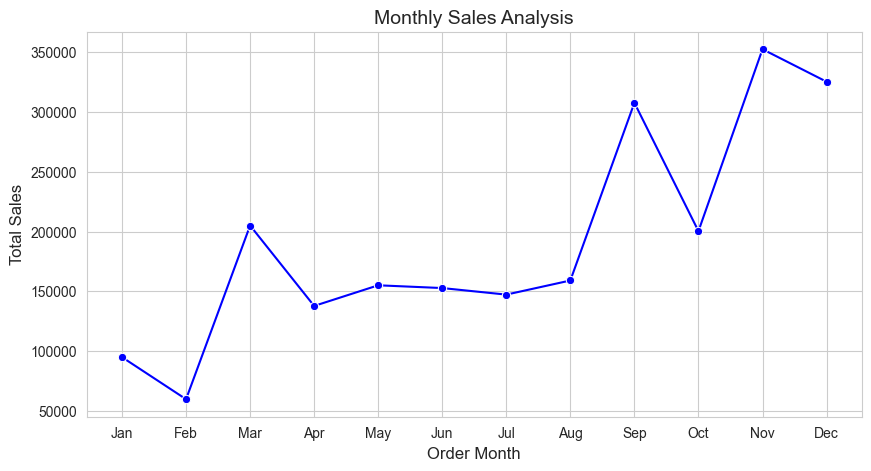

In [11]:
# Group sales data by month
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Order Month', y='Sales', data=sales_by_month, marker='o', color='b')

# Add title and labels
plt.title('Monthly Sales Analysis', fontsize=14)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])  # Format x-axis labels as months
plt.grid(True)

# Show the plot
plt.show()


# Conclusion from the Monthly Sales Analysis:
1) Seasonal Trends: Sales fluctuate throughout the year, with noticeable peaks in March, September, and November, indicating possible seasonal demand or promotional events.
2) Low Sales Periods: Sales are relatively lower in February and July, suggesting potential off-seasons or less consumer activity during these months.
3) End-of-Year Surge: There is a sharp increase in sales in November and December, likely due to festive shopping, holiday discounts, or end-of-year promotions.
4) Steady Growth: Despite some fluctuations, sales generally increase in the second half of the year, indicating stronger market performance in later months.

# Sales Analysis by Category

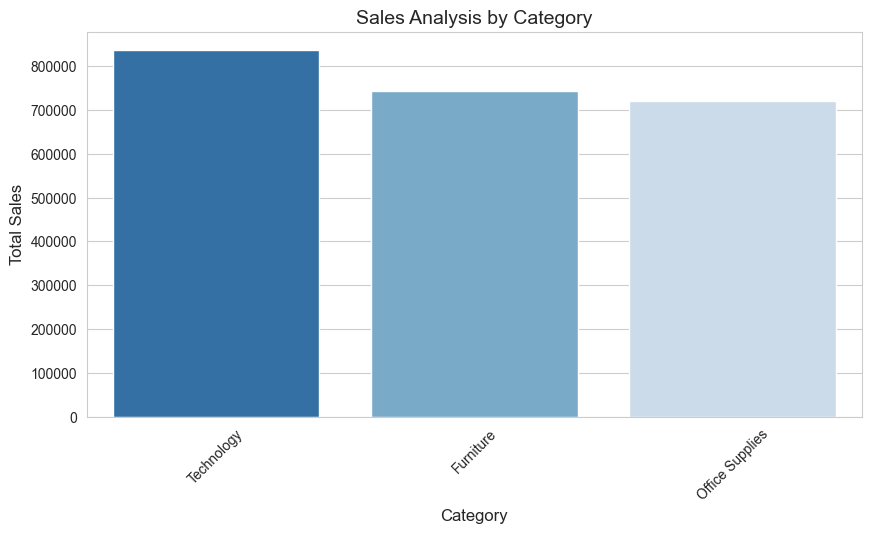

In [13]:
# Group sales data by category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Sort categories by sales (optional for better visualization)
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

# Plot the sales distribution by category
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='Blues_r',hue='Category')

# Add title and labels
plt.title('Sales Analysis by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


# Conclusion for Sales Analysis by Category

1) Top-Performing Category:
    Technology has the highest sales, indicating strong demand for tech-related products.

2) Mid-Performing Category:
    Furniture ranks second in total sales, showing steady demand but slightly lower than Technology.

3) Lowest-Performing Category:
    Office Supplies has the least sales among the three categories, though still significant.

# Sales Analysis by Sub-Category

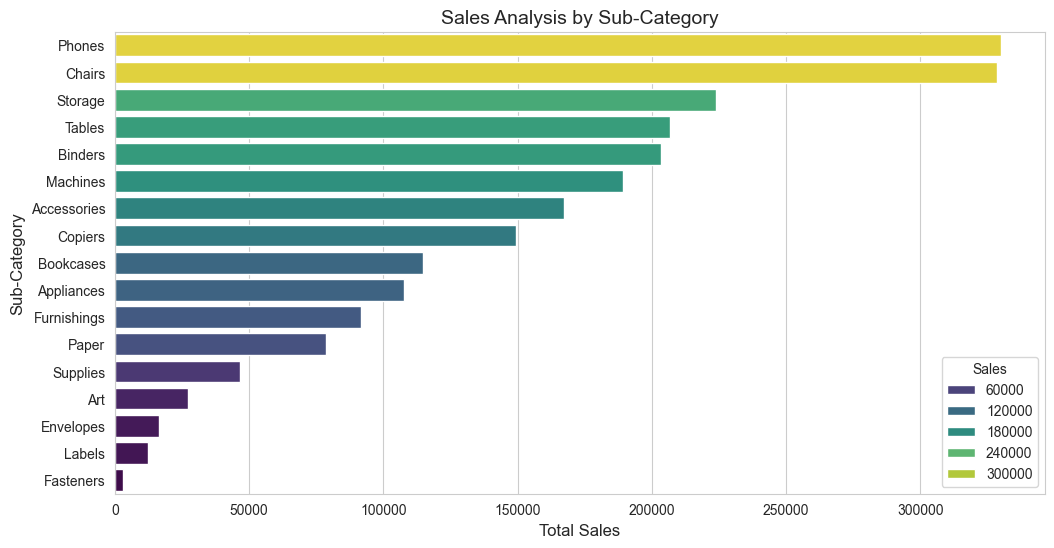

In [16]:
# Group sales data by sub-category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort sub-categories by sales for better visualization
sales_by_subcategory = sales_by_subcategory.sort_values(by='Sales', ascending=False)

# Plot sales distribution by sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Sub-Category', data=sales_by_subcategory, palette='viridis',hue="Sales")

# Add title and labels
plt.title('Sales Analysis by Sub-Category', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Show the plot
plt.show()


# Conclusion from Sales Analysis by Sub-Category

1) Top-Selling Sub-Categories:
    > Phones and Chairs generate the highest sales, making them key revenue drivers.
    > Storage, Tables, and Binders also contribute significantly to overall sales.

2) Moderate Performers:
    > Machines, Accessories, and Copiers have decent sales but do not outperform the top categories.
    > Bookcases and Appliances show steady sales, indicating stable demand.

3) Lowest-Selling Sub-Categories:
    > Fasteners, Labels, and Envelopes have the least sales, suggesting lower customer interest or lower price points.
    > Art and Supplies also fall in the low-sales category, which might need targeted promotions or strategic improvements.

# Monthly Profit Analysis

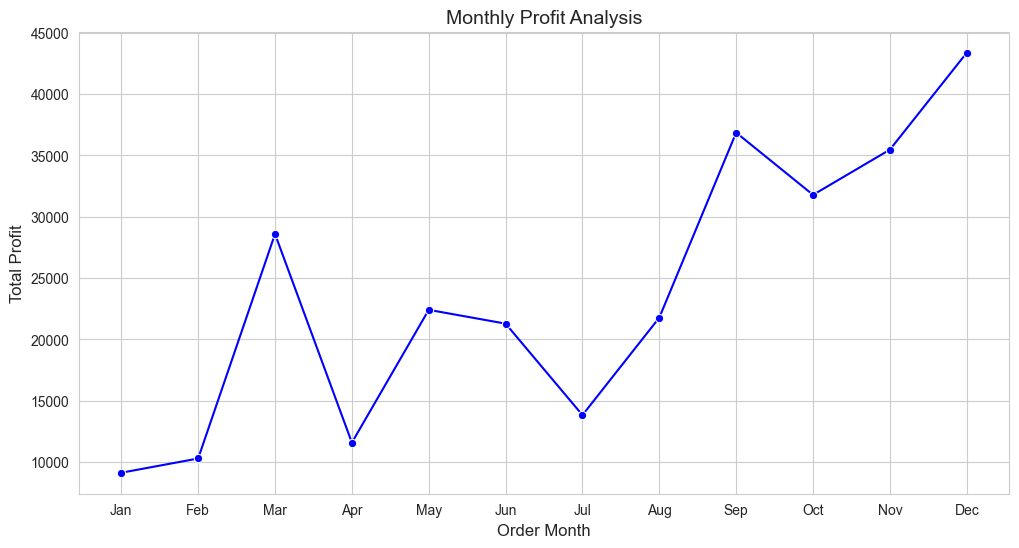

In [17]:
# Group profit data by month
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

# Sort months for proper visualization
profit_by_month = profit_by_month.sort_values(by='Order Month')

# Plot the monthly profit trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Profit', data=profit_by_month, marker='o', color='b', linestyle='-')

# Add title and labels
plt.title('Monthly Profit Analysis', fontsize=14)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Show the plot
plt.show()


# Conclusion
The monthly profit analysis reveals significant fluctuations throughout the year. The highest profit months are December and September, likely due to increased consumer spending during the holiday season and year-end promotions. In contrast, January, February, and July show the lowest profit margins, indicating weak demand or higher operational costs during these periods. A sharp rise in March followed by a dip in April and July suggests seasonal variations or external market factors affecting profitability. From August onwards, profits consistently increase, peaking in December, highlighting a strong sales season towards the end of the year. To optimize business performance, strategies such as targeted promotions, discount offers, and marketing campaigns should be implemented during low-profit months. Additionally, analyzing cost structures and sales strategies from high-profit months can help replicate their success in weaker months, ensuring steady growth and improved profitability throughout the year.

# Profit Analysis by Category

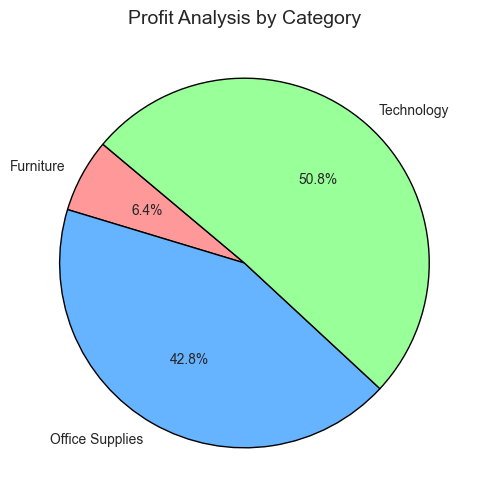

In [18]:
# Group profit data by category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# Define colors for better visualization
colors = ['#ff9999','#66b3ff','#99ff99']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(profit_by_category['Profit'], 
        labels=profit_by_category['Category'], 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Profit Analysis by Category', fontsize=14)

# Show the plot
plt.show()

# Conclusion
From the pie chart, we observe that Technology contributes the highest proportion of total profit, accounting for 50.8%. This indicates that technology-related products are the most profitable segment. Office Supplies follows closely with 42.8%, showing that despite possibly lower unit prices, this category still generates a significant profit. However, Furniture has the lowest profit contribution at only 6.4%, suggesting either high costs, lower sales, or lower profit margins in this category.

This analysis highlights that focusing on Technology and Office Supplies may be more beneficial for maximizing profitability, while strategies to improve Furniture sales or margins should be explored.

# Profit Analysis by Sub-Category

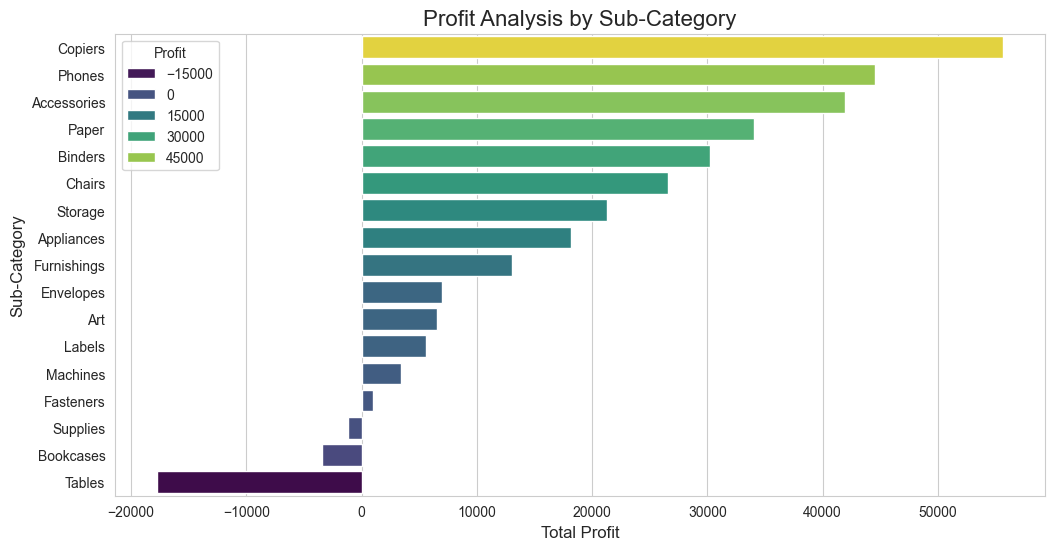

In [21]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort sub-categories by profit in descending order for better visualization
profit_by_subcategory = profit_by_subcategory.sort_values(by='Profit', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x='Profit', y='Sub-Category', data=profit_by_subcategory, palette='viridis',hue='Profit')

# Add title and labels
plt.title('Profit Analysis by Sub-Category', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Show the plot
plt.show()

# Conclusion: Profit Analysis by Sub-Category
From the Profit Analysis by Sub-Category visualization, we observe significant variations in profitability across different product sub-categories.

1) Top-Performing Sub-Categories:
      > Copiers generate the highest profit, followed by Phones and Accessories, indicating strong demand and high-margin sales.
      > Other profitable sub-categories include Paper, Binders, and Chairs, contributing substantially to the overall profit.

2) Low-Performing Sub-Categories:
      > Tables and Bookcases show negative profits, indicating losses. This could be due to high costs, discounts, or low sales volume.
      > Supplies, Fasteners, and Machines have relatively low profit, suggesting areas where pricing or sales strategies may need optimization.

3) Business Insights:
      > The company should focus on promoting high-margin products like Copiers and Phones to sustain profitability.
      > Strategies such as cost-cutting, better pricing, or bundling deals could help improve the performance of loss-making sub-categories.
      > Further analysis of cost structure and sales trends can provide deeper insights into why certain sub-categories are underperforming.

# Sales and Profit Analysis by Customer Segment

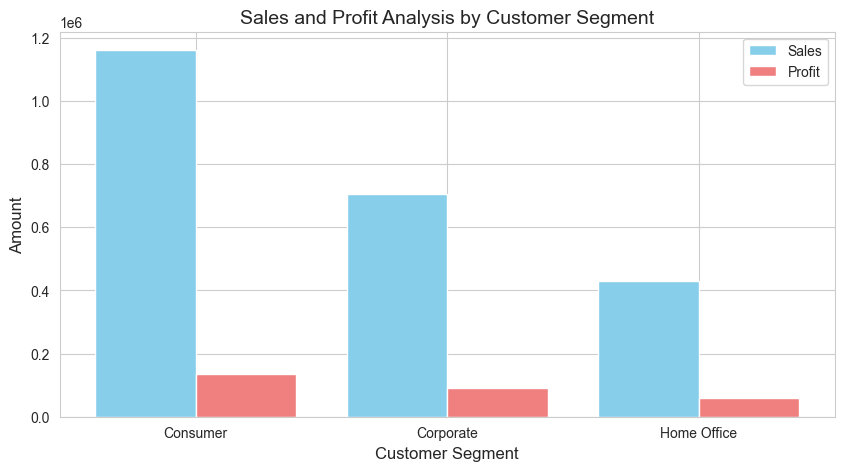

In [22]:
# Group sales and profit by customer segment
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot sales and profit for each segment
plt.figure(figsize=(10, 5))
bar_width = 0.4
x = np.arange(len(sales_profit_by_segment['Segment']))

plt.bar(x - bar_width/2, sales_profit_by_segment['Sales'], width=bar_width, label='Sales', color='skyblue')
plt.bar(x + bar_width/2, sales_profit_by_segment['Profit'], width=bar_width, label='Profit', color='lightcoral')

# Customize plot
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Sales and Profit Analysis by Customer Segment', fontsize=14)
plt.xticks(ticks=x, labels=sales_profit_by_segment['Segment'], rotation=0)
plt.legend()

# Show the plot
plt.show()

# Conclusion
1) The Consumer segment has the highest sales, followed by Corporate and Home Office.
2) Despite high sales, profit margins remain relatively lower across all segments.
3) The Consumer segment contributes significantly to both sales and profit.
4) The Corporate segment also has considerable sales but lower profit. 
5) The Home Office segment generates the lowest sales and profit. 
6) Optimizing profit margins in the Corporate and Home Office segments could improve overall profitability.


# Analyse sales-to-profit ratio

In [23]:
# Grouping data by 'Segment' and calculating total Sales and Profit
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Avoiding division by zero or negative profit issues
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit'].replace(0, float('nan'))

# Displaying only relevant columns
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


# Conclusion:
1) The Consumer segment has the highest Sales-to-Profit ratio (8.66), indicating that it generates the most sales compared to its profit. However, it may also suggest lower profit margins.
2) The Corporate segment follows with a ratio of 7.68, showing a slightly better balance between sales and profit.
3) The Home Office segment has the lowest ratio (7.13), meaning it achieves the best profitability relative to sales.